# Decision Tree - Classification - Master NB

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Load the dataset

In [33]:
df = pd.read_excel('sample_data.xlsx')
df.head(5)

,Income,LoanAmount,CreditScore,InterestRate,Target
0,85994,50587,520,15.23,0
1,50432,124440,458,4.81,0
2,84208,129188,451,21.17,1
3,31713,44799,743,7.07,0
4,20437,9139,633,6.51,0


In [3]:
df.shape

(500, 5)

## Balance Check

In [4]:
df["Target"].value_counts()

0    449
1     51
Name: Target, dtype: int64

**Note**: We have an **unbalance data**. Because there are 449--> 0 and 51--> 1 in our target variable. 

* We should consider this situation while interpreting the eval metrics. We cannot interpret "accuracy" at unbalanced data. We should focus on individual scores like "Precision, recall and f1".

* But if we add "stratify = true" parameter to --> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, **stratify=y**)  

and "class_weight="balanced"" paarmeter to --> RandomForestClassifier(**class_weight="balanced"**, random_state=42)

our **model can handle with unbalance problem and we can interpret "accuracy" score**. 



## Labelling

In [6]:
# Define the features and the target variable
X = df.drop(columns=['Target'])
y = df['Target']

## Split Train | Test

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Estimate the Base (Vanillia) Model

It works by using **default parameters**.

In [14]:
# Base Decision Tree Model
base_model = DecisionTreeClassifier(class_weight="balanced", random_state=42)
base_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

## Eval Metrics 

In [15]:
# Make predictions and evaluate the base model for train
y_train_pred = base_model.predict(X_train)

# Confusion Matrix for Base Model
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix for Train:\n", conf_matrix_train)

# Eval Metrics for Base Model
print(classification_report(y_train, y_train_pred))

Confusion Matrix for Train:
 [[362   0]
 [  0  38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       362
           1       1.00      1.00      1.00        38

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



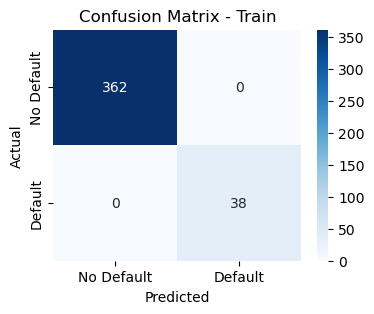

In [16]:
# Plot the Confusion Matrix for Train
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix - Train')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
# Make predictions and evaluate the base model for test
y_pred = base_model.predict(X_test)

# Confusion Matrix for Base Model
conf_matrix_test = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Test:\n", conf_matrix_test)

# Eval Metrics for Base Model
print(classification_report(y_test, y_pred))

Confusion Matrix for Test:
 [[80  7]
 [12  1]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        87
           1       0.12      0.08      0.10        13

    accuracy                           0.81       100
   macro avg       0.50      0.50      0.49       100
weighted avg       0.77      0.81      0.79       100



* Since we have unbalanced data, we should interpret "**individual results like precison, recall and f1**".

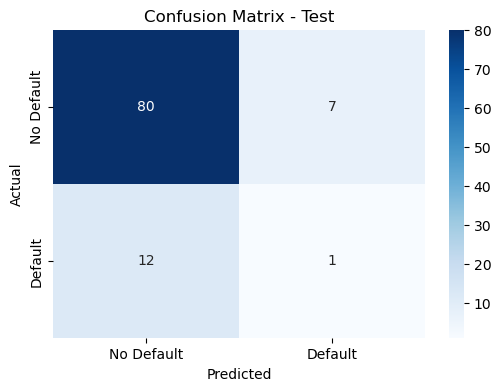

In [18]:
# Plot the Confusion Matrix for Base Model
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix - Test')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Comment:** While DT has high succes in train data, it is not succesfulf at test data. So, there is **overfitting** problem now. 

* We should apply **Fine (Hyperparameter) Tuning**.

## Hyperparameter Tuning

We want to determine best parameter for DT

In [19]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=1)

In [20]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [21]:
# Best Model with Best Parameters
best_model = DecisionTreeClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [22]:
# Make predictions and evaluate the best model for train
y_train_pred = best_model.predict(X_train)

# Confusion Matrix for Base Model
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix for Train:\n", conf_matrix_train)

# Eval Metrics for Base Model
print(classification_report(y_train, y_train_pred))

Confusion Matrix for Train:
 [[362   0]
 [ 37   1]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       362
           1       1.00      0.03      0.05        38

    accuracy                           0.91       400
   macro avg       0.95      0.51      0.50       400
weighted avg       0.92      0.91      0.87       400



In [23]:
# Make predictions and evaluate the base model for test
y_pred = best_model.predict(X_test)

# Confusion Matrix for Base Model
conf_matrix_test = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Test:\n", conf_matrix_test)

# Eval Metrics for Base Model
print(classification_report(y_test, y_pred))

Confusion Matrix for Test:
 [[87  0]
 [13  0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        87
           1       0.00      0.00      0.00        13

    accuracy                           0.87       100
   macro avg       0.43      0.50      0.47       100
weighted avg       0.76      0.87      0.81       100



# Final Model

Use **all data** and **best hyperparameters**. 

In [25]:
# Define the features and the target variable
X = df.drop(columns=['Target'])
y = df['Target']

**Determined best hyper parameters**


In [26]:
# Final Decision Tree Model using the best hyperparameters 
final_DT_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=42)
final_DT_model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

## Save the Final Model

We can save the model using joblib or pikle. Joblib is easier.

In [27]:
import joblib

joblib.dump(final_DT_model, 'final_DT_model.joblib')

['final_DT_model.joblib']

In [28]:
# TASK is completed.

## Prediction

If you want to apply is you can get predictions.   

### Load the Saved Model

In [29]:
loaded_model = joblib.load('final_DT_model.joblib')

In [30]:
df.head(2)

,Income,LoanAmount,CreditScore,InterestRate,Target
0,85994,50587,520,15.23,0
1,50432,124440,458,4.81,0


In [31]:
# An sample data

new_data = pd.DataFrame({
    'Income': [100],
    'LoanAmount': [50000000],
    'CreditScore': [100],
    'InterestRate': [50]
})

### Get Prediction

In [32]:
loaded_model.predict(new_data)

array([1], dtype=int64)

**DECISION:** This customer will fall to default. Credit **REJECTED**.  **:((**